# Expanding Universe -- Age
### Dhiraj Kumar Hazra, IMSc, Chennai, India


### References

* Cosmology, Steven Weinberg
* Theoretical Astrophysics, Vol III, T. Padmanabhan
* Wayne Hu's UChicago lecture notes

In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

### FLRW metric

$$ds^2=c^2 dt^2-a^2(t)\left[\frac{dr^2}{1-Kr^2}+r^2\left(d\theta^2+sin^2\theta d\phi^2\right)\right]$$

The quantity $K$ can be +1, 0 and -1 depending on the spatial curvature of the Universe. _Need to be careful about the units_ 

#### Import the necessary libraries

In [18]:
import numpy as np
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import integrate 
rc('text', usetex=True)

**Constants** 

We will need constants such as speed of light and unit conversion factors etc. I have stored them in constants.py file

**Planck**

While we will constrain the cosmological parameters using observations in the upcoming lectures, to calculate cosmological quantities based on a baseline cosmology and the baseline parameter values, we need the best fit/mean values of the parameters. Here in Planckbf.py I have noted down the Planck 2018 baseline bestfits. 


In [19]:
import constants as const 
import Planckbf as Pl

## Friedmann Equations

1. $$H^2=\left(\frac{\dot a}{a}\right)^2=\frac{8\pi G}{3}\rho - \frac{Kc^2}{a^2}$$

2. $$\dot{H}+H^2=\left(\frac{\ddot a}{a}\right)=-\frac{4\pi G}{3}\left(\rho+\frac{3p}{c^2}\right)$$

## Age of the Universe

Age of the Universe can be calculated by integrating $\frac{dt}{da}$ from $a=0$ to $a=1$ (today). In this lecture we will only talk about cosmological constant as the dark energy. Therefore a general equation of state is not required and we will work with $w=-1$. **Note that these codes will have to be non-trivially modified to incorporate time dependent equation of state of dark energy**

#### Defining dt/da

$$h(z)=\frac{H(z)}{H_0}=\left[\frac{\Omega_{\rm r}}{a^4}+\frac{\Omega_{\rm m}}{a^3}+\frac{\Omega_{\rm k}}{a^2}+\Omega_{\Lambda}\right]^{1/2}$$


$$t=\int^{a}_{0}\frac{a' da'}{H_0\left[\Omega_{\rm r}+\Omega_{\rm m} a' +\Omega_{\rm k}{a'^2}+\Omega_{\Lambda}a'^4\right]^{1/2}}$$


In [20]:

def dt_da_LCDM(a,Om_m,Om_l,Om_r,H0):
    Om_k=1-Om_m-Om_l-Om_r
    da_dt=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+Om_l*a**4)
    dt_da=a/da_dt
    return dt_da


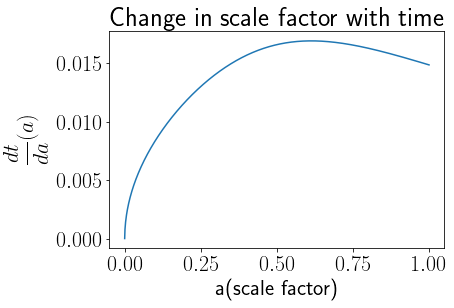

In [21]:


# show the evolution of scale factor
Om_m=Pl.Omega_mB
Om_l=Pl.Omega_lB
Om_r=Pl.Omega_rB
H0=Pl.H0B


# Prepare the data
a = np.linspace(0, 1, 1000)
plt.plot(a,dt_da_LCDM(a,Om_m,Om_l,Om_r,H0))
plt.xlabel("a(scale factor)")
plt.ylabel(r"$$\frac{dt}{da}(a)$$")
plt.title('Change in scale factor with time')
plt.show()



### Dependence on the $\Omega_{\rm m}$

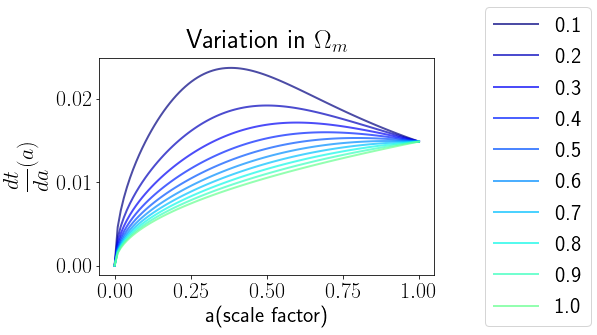

In [22]:
a = np.linspace(0, 1, 100)
Num_Steps=10
Om_m=np.linspace(0.1, 1, Num_Steps)
Om_k=np.zeros(Num_Steps)
Om_r=np.full(Num_Steps,Pl.Omega_rB)
Om_l=1-Om_m-Om_r-Om_k

n = 20
colors = plt.cm.jet(np.linspace(0,1,n))


for i in range(Num_Steps):
    plt.plot(a,dt_da_LCDM(a,Om_m[i],Om_l[i],Om_r[i],H0)
    ,alpha=0.7,linewidth=2,color=colors[i],label=f'{Om_m[i]:.1f}')   
plt.xlabel("a(scale factor)")
plt.ylabel(r"$$\frac{dt}{da}(a)$$")
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right')
plt.title('Variation in $\Omega_{m}$')
plt.show()    

In [23]:

def dt_da_LCDM_integrand(x):
    # show the evolution of scale factor
    Om_m=Pl.Omega_mB
    Om_l=Pl.Omega_lB
    Om_r=Pl.Omega_rB
    #Omega-r must have non-zero value to integrate from a=0
    #Pl.Omega_rB
    H0=Pl.H0B
    dt_da_LCDM_integrand=dt_da_LCDM(x,Om_m,Om_l,Om_r,H0)
    return dt_da_LCDM_integrand

def Age_Universe(a,Omm,Oml,Omr,H0):
    Om_m=Omm
    Om_l=Oml
    Om_r=Omr
    H0=H0
    Age_Universe= integrate.romberg(dt_da_LCDM,0,a,
                                    args=(Om_m,Om_l,Om_r,H0),
                                    rtol=1e-3)*const.MPc/const.Km/const.Gyr
    return Age_Universe


### Integrate to get the age of the Universe

In [24]:
Age= integrate.romberg(dt_da_LCDM_integrand,0,1
                       ,rtol=1e-3)*const.MPc/const.Km/const.Gyr
print("Age of the Universe today is:", f'{Age:.2f}','Gigayears')

Age of the Universe today is: 13.79 Gigayears


## Try these yourself

1. Reproduce the results discussed in the lecture in any programming language you are comfortable with.
2. Obtain the age of the Universe when the scale factor was $a=\frac{1}{1100+1}$
3. Obtain the age of the Universe as a function of the scale factor